<a href="https://colab.research.google.com/github/dilia-w/Visao-Computacional/blob/main/11_Obtendo_informa%C3%A7%C3%A3o_sobre_a_rota%C3%A7%C3%A3o_com_o_ORB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

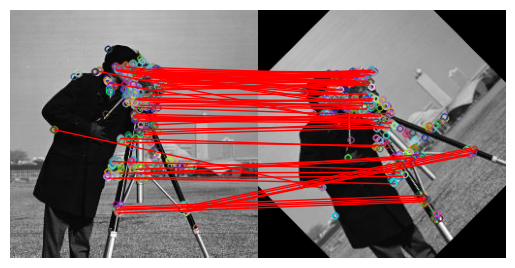

In [1]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

# Fazendo o download da imagem
image_url = 'https://www.math.hkust.edu.hk/~masyleung/Teaching/CAS/MATLAB/image/images/cameraman.jpg'
urllib.request.urlretrieve(image_url, 'lena_gray.png')

# Lendo a imagem em escala de cinza
imagem = cv2.imread('lena_gray.png', cv2.IMREAD_GRAYSCALE)

# Criando o detector ORB
orb = cv2.ORB_create()
keypoints = orb.detect(imagem, None)
imagem_orb = cv2.drawKeypoints(imagem, keypoints, None)

# Rotacionando a imagem
altura, largura = imagem.shape[:2]
centro = (largura // 2, altura // 2)
angulo = 45
rotacao_matriz = cv2.getRotationMatrix2D(centro, angulo, 1)
imagem_rotacionada = cv2.warpAffine(imagem, rotacao_matriz, (largura, altura))

# Detectando os pontos chave na imagem rotacionada
keypoints_rotacionados = orb.detect(imagem_rotacionada, None)
imagem_orb_rotacionada = cv2.drawKeypoints(imagem_rotacionada, keypoints_rotacionados, None)

# Calculando os pontos transformados
pontos_originais = np.float32([keypoint.pt for keypoint in keypoints]).reshape(-1, 1, 2)
pontos_rotacionados = np.float32([keypoint.pt for keypoint in keypoints_rotacionados]).reshape(-1, 1, 2)
pontos_originais_transformados = cv2.transform(pontos_originais, rotacao_matriz)

# Concatenando as imagens
imagem_final = np.concatenate((imagem_orb, imagem_orb_rotacionada), axis=1)

# Exibindo a imagem final
plt.figure()
plt.imshow(imagem_final, cmap='gray')

# Adicionando linhas entre pontos originais e transformados
offset = imagem_orb.shape[1]
for i in range(min(len(pontos_originais), len(pontos_rotacionados)) // 10 + 30):
    i += 30
    x1, y1 = pontos_originais[i][0]
    x2, y2 = pontos_rotacionados[i][0]
    x1_transformado, y1_transformado = pontos_originais_transformados[i][0]
    x1_transformado += offset
    plt.plot([x1, x1_transformado], [y1, y1_transformado], 'r-', lw=1)

plt.axis('off')
plt.show()
